# Lending Club Case Study


# Problem Statement
Lending Club is a consumer finance marketplace that connects borrowers seeking personal loans with investors looking to lend money for a return. It specializes in providing various types of loans to customers. When the company receives a loan application, it must decide whether to approve the loan based on the applicant's profile.

Like most lending companies, lending to 'risky' applicants is the largest source of financial loss, known as credit loss. Credit loss occurs when the lender loses money because the borrower refuses to pay or absconds with the money owed. In other words, borrowers who default cause the most significant loss to the lenders. In this context, customers labeled as 'charged-off' are considered 'defaulters'.

The core objective of this exercise is to help the company minimize credit loss. There are two potential sources of credit loss:

* **Applicant likely to repay the loan:** Such applicants would bring profit to the company through interest rates. Rejecting these applicants would result in a loss of business.
* **Applicant not likely to repay the loan:** Approving a loan for such applicants may lead to a financial loss for the company.

## Objectives
The goal is to identify risky loan applicants so that such loans can be reduced, thereby cutting down the amount of credit loss. The aim of this case study is to use Exploratory Data Analysis (EDA) on the given dataset to identify these applicants.

By identifying risky loan applicants, the company can minimize credit loss. The objective is to understand the driving factors (or driver variables) behind loan default, i.e., **the variables that are strong indicators of default**. The company can utilize this knowledge for better portfolio and risk assessment.

## Data Understanding

The data provided in the data set loan.csv contains information about past loan applicants and whether they defaulted. The goal is to identify patterns that indicate if a person is likely to default. This information can be used to make decisions such as denying the loan, reducing the loan amount, or lending to risky applicants at a higher interest rate.

#### Leading Attribute
* *Loan Accepted* - Three Scenarios
    * *Fully Paid* -  Applicant has fully paid the loan (the principal and the interest rate)
    * *Current* - Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    * *Charged-off* - Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has *defaulted* on the loan 
* *Loan Rejected* - The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Library Imports

In [6]:
#pip install 'seaborn<=0.13.0' --force-reinstall

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load data from CSV

In [9]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## *Data Cleaning and Manipulation*

### Data Processing using EDA


#### Rows & Columns Analysis
- Find and drop off columns which are of same value throughout the entire rows
- Find number of rows which has loan status as Current which means the loan installment is still in progress and drop such rows
- Certain column data doesnt add value to data analysis hence can be dropped
- Dropping columns with majority(ie 50%) of rows being the NULL values which doesnt help in Data Analysis
- Data Imputing for revol_util and emp_length columns which are blank with median,mean  values respectively
- Data Type Conversion

### Find and drop off columns which are of same value throughout the entire rows

In [13]:
same_value_columns = loan.columns[loan.nunique()<=1].tolist()
print('same value columns are ',same_value_columns)
null_columns_len=len(same_value_columns)
print('Total number of columns whch are of same value across all rows be it NA,NAN,0,1,INDIVIDUAL : ', null_columns_len)
loan.drop(columns=same_value_columns, inplace=True)
#print(loan)
loan.shape

same value columns are  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120

(39717, 48)

In [14]:
#Find duplicate rows
duplicates=loan.duplicated()
#Coumnt duplicate rows
total_duplicate_rows=duplicates.sum()
# Display the number of duplicate rows
print("\nNumber of duplicate rows:", total_duplicate_rows)
# Drop duplicate rows if any
loan.drop_duplicates(inplace=True)
loan.shape


Number of duplicate rows: 0


(39717, 48)

#### Find number of rows which has loan status as Current which means the loan installment is still in progress and drop such rows

In [16]:

Current_loan_rows=loan[loan['loan_status']=='Current']
print("\n Number of rows with loan status as Current :",len(Current_loan_rows))
loan.drop(Current_loan_rows.index,inplace=True)

loan.shape


 Number of rows with loan status as Current : 1140


(38577, 48)

In [17]:
# data related to id,member_id,emp_title,issue_d,url,desc,title,zip_code,addr_state dont add value
#print(loan)
remove_columns=['id','member_id', 
                          'emp_title', 'issue_d', 
                          'url', 'desc',
                          'title', 'zip_code', 'addr_state']
removed_columns=list(remove_columns)
#print(removed_columns)
loan.drop(columns=removed_columns,inplace=True)
loan.shape
#print(loan)

(38577, 39)

In [18]:
# Certain column data doesnt add value to data analysis hence can be dropped
remove_columns=['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'pub_rec', 
                          'revol_bal', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d','next_pymnt_d','mths_since_last_record'

                          ]
removed_columns=list(remove_columns)
loan.drop(columns=removed_columns,  inplace=True)
loan.shape
#print(loan)

(38577, 20)

In [19]:
loan.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'mths_since_last_delinq',
 'open_acc',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

In [20]:
#Dropping columns with majority of rows being the NULL values which doesnt help in Data Analysis
for col in loan.columns:
    missing_values = round(loan[col].isna().sum() / loan.shape[0], 2)
    if missing_values >= 0.50:
        loan.drop(col, axis = 1, inplace = True)
        print("\n Dropping Columns since its majority of values are NA :",col)
        
loan.shape


 Dropping Columns since its majority of values are NA : mths_since_last_delinq


(38577, 19)

In [21]:
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [22]:
# Data Imputing for revol_util and emp_length columns which are blank with median,mean  values respectively

def data_imputing (df: pd.DataFrame, column: str,str_replace):
    df[column].fillna('100%' , inplace=True)
    df[column]=df[column].astype(str)
    df[column] = df[column].apply(lambda x: float(x.replace(str_replace, '').strip()))
    if column == 'revol_util':
        imputing_val = (df[column].median())
    elif column == 'emp_length':
        imputing_val = int(df[column].mean())
    else:
        imputing_val = df[column].mode()
    df[column]=df[column].replace(100,imputing_val)

data_imputing(loan,'revol_util','%')
for emp_length_str in ['years','year','+','<']:
    loan['emp_length'] = loan['emp_length'].str.replace(emp_length_str, '')
data_imputing(loan,'emp_length','%')
#data_imputing(loan,'pub_rec_bankruptcies','%')
    


In [23]:
# Data Type Conversion
loan = loan.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

# Convert term column to int type
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

# Convert int_rate column to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))
loan.isna().sum()

# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan[col] = loan[col].apply(lambda x: round(x, 2))


In [24]:
loan.shape

(38577, 19)

## Data Analysis

1. Outlier Understanding
2. Derived Columns
3. Univariate Analysis
4. Bivariate Analysis
5. Correlation


#### Outlier Understanding


C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


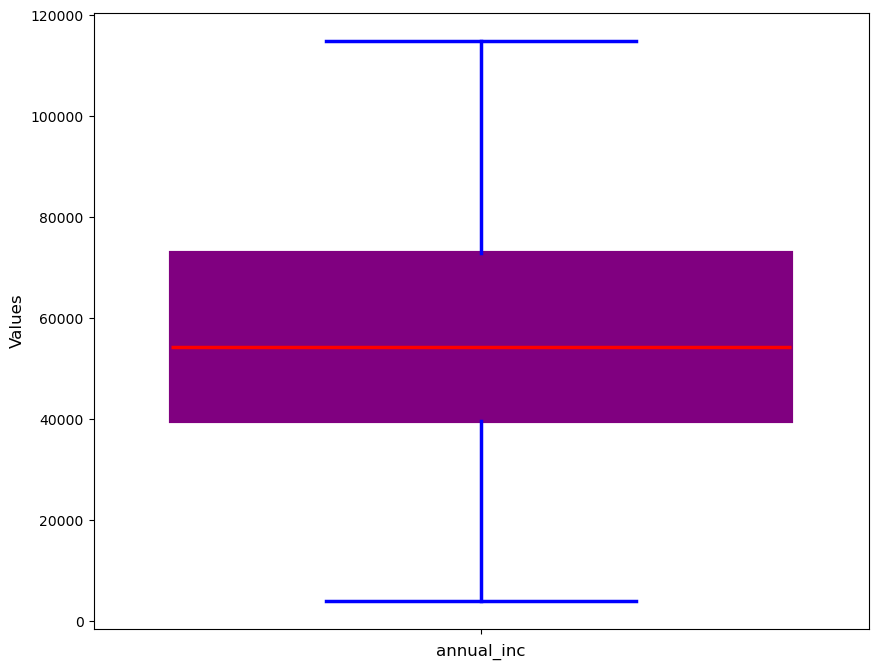

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


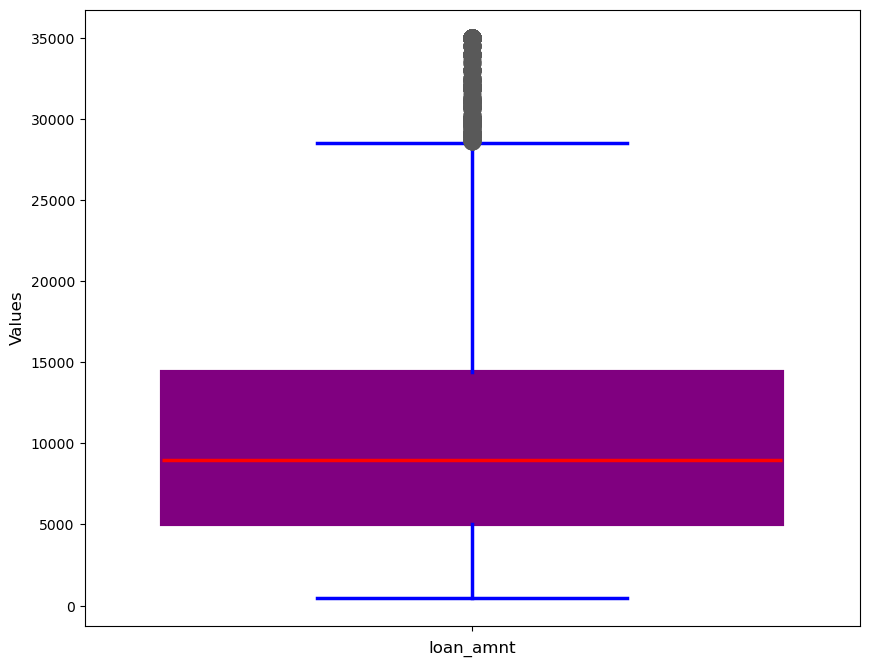

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


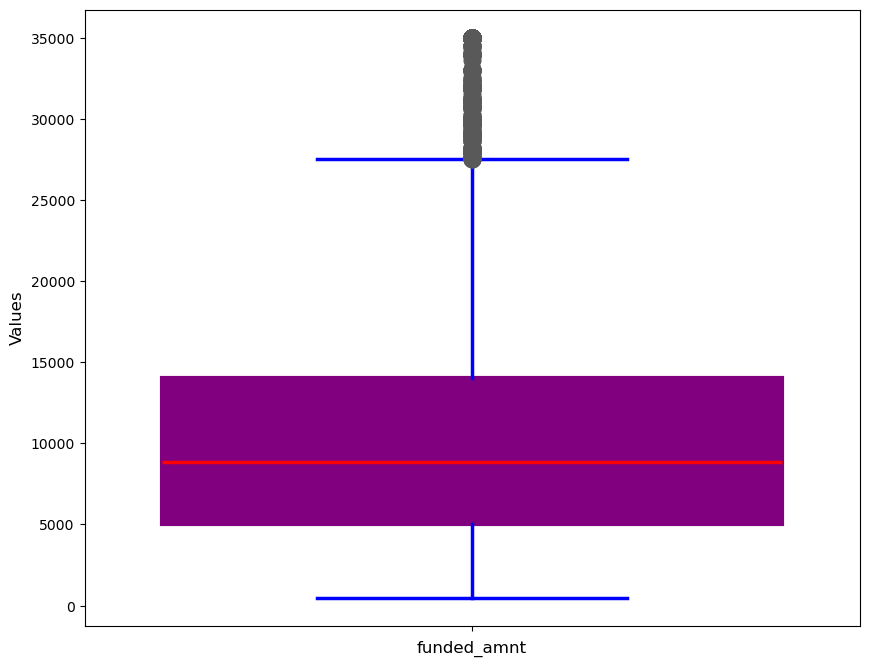

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


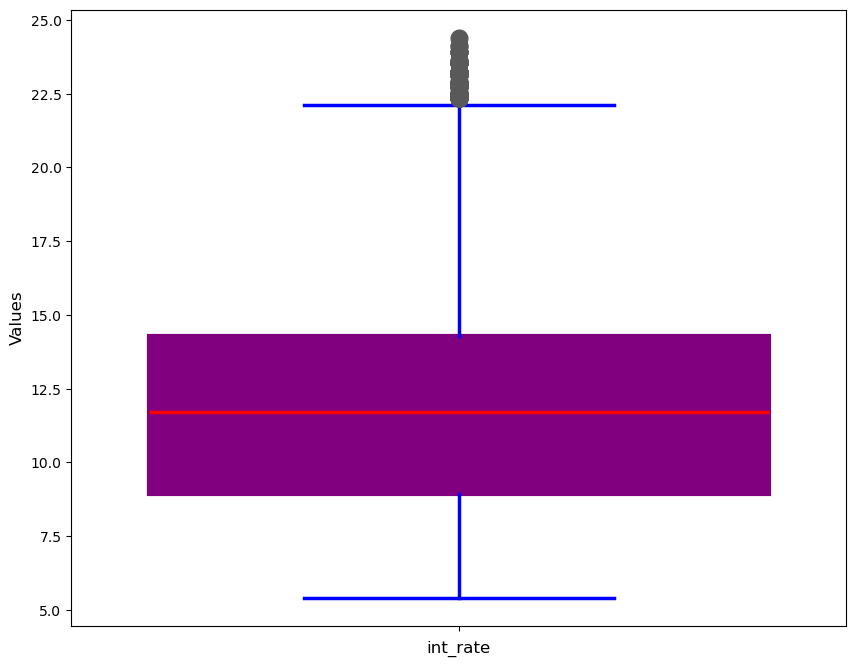

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


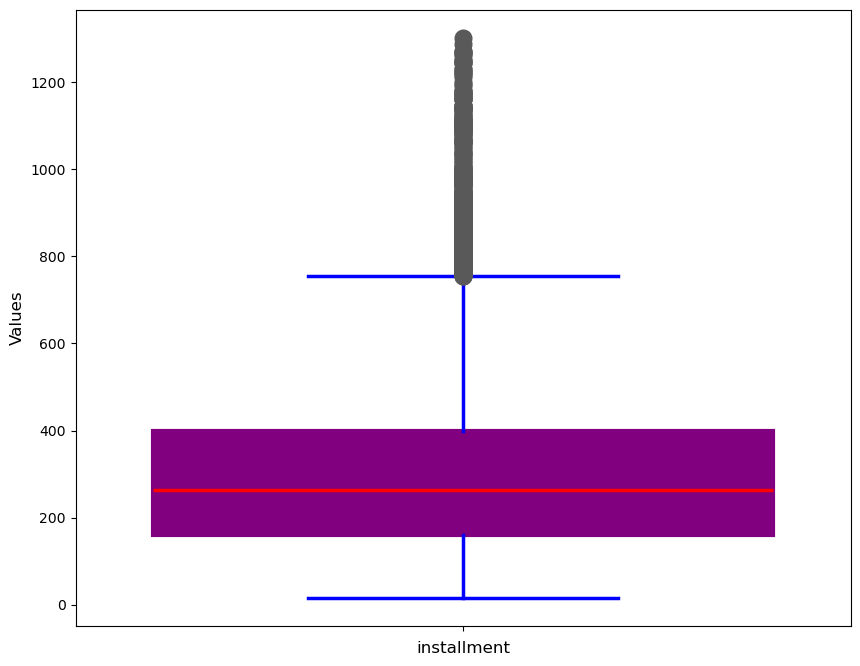

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


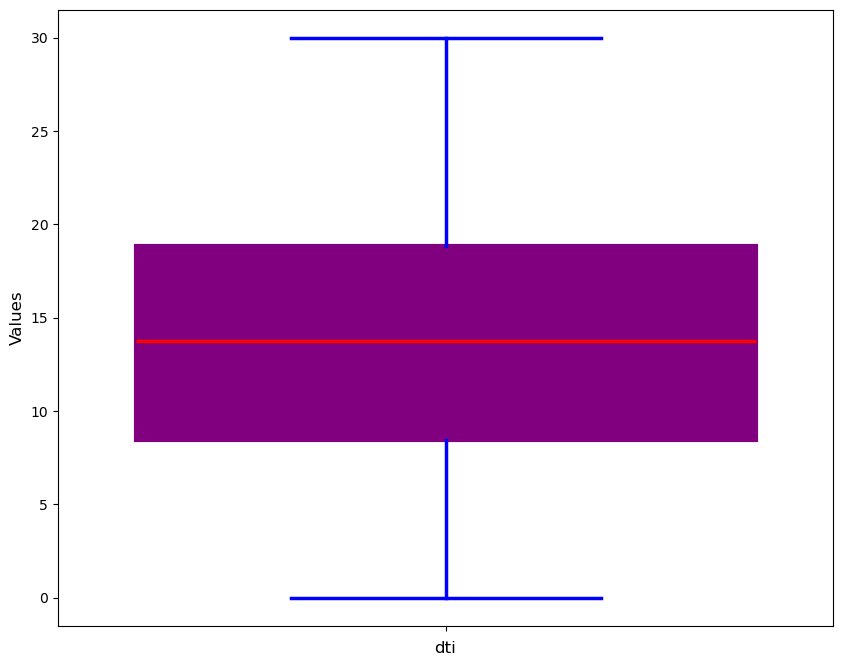

In [27]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    quartile1 = df[column].quantile(0.0)
    quartile3 = df[column].quantile(0.9)
    iqr = quartile3 - quartile1
    return quartile1, quartile3

def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    plt.figure(figsize=(10, 8))
    
    # Customize the appearance
    boxprops = dict(linestyle='-', linewidth=3, color='purple')
    flierprops = dict(marker='o', color='orange', markersize=12)
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    whiskerprops = dict(color='blue', linewidth=2.5)
    capprops = dict(color='blue', linewidth=2.5)
    
    if horizontal:
        sb.boxplot(
            y=df[column_name], orient='h', palette='Set2',
            boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops
        )
    else:
        sb.boxplot(
            x=df[column_name], orient='v', palette='Set2',
            boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops
        )
    
    if title:
        plt.title(title, fontsize=15, fontweight='bold')
    
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

# Calculate the lower bound and upper bound
is_annual_inc_lb,is_annual_inc_ub = calculate_boxplot_stats(loan, 'annual_inc')
is_annual_inc_lt = loan.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

# Filter the rows with required annual income range between lower and upper bound
loan = loan[req_income]

for col in ['annual_inc','loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'dti']:
    create_boxplot(loan, col, horizontal=True)

### Outlier Analysis Summary
- The annual income of most of the loan applicants is between 38000 - 68000 USD
- The loan amount of most of the loan applicants is between 5000 - 13000 USD 
- The funded amount of most of the loan applicants is between 5000 - 13000 USD 
- The interest rate on the loan is between 9% - 14%
- The monthly installment amount on the loan is between 150 - 400 months
- The debt to income ration is between 8 - 19%

 #### Derived Columns
1. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
2. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

In [30]:
loan_status_map = {'Charged Off': 0, 'Fully Paid': 1 }
loan['loan_paid'] = loan['loan_status'].map(loan_status_map)

In [31]:
def bucket_data(column, thresholds, labels) -> str:
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [32]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan['loan_amnt_bucket'] = loan['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [33]:
loan[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39711,5000.0,5K - 10K
39712,2500.0,0 - 5K
39713,8500.0,5K - 10K
39714,5000.0,5K - 10K


In [34]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan['int_rate_bucket'] = loan['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [35]:
loan[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39711,8.70,5%-9%
39712,8.07,5%-9%
39713,10.28,9%-13%
39714,8.07,5%-9%


In [36]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan['annual_inc_bucket'] = loan['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [37]:
loan[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39711,75000.0,70k - 80k
39712,110000.0,80k - above
39713,18000.0,0 - 40k
39714,100000.0,80k - above


In [38]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['<8% Very Low', '8%-12% Low', '12%-16% Medium', '16%-20% High', '20%+ Very High']
loan['dti_bucket'] = loan['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

In [39]:
loan[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,20%+ Very High
1,1.00,<8% Very Low
2,8.72,8%-12% Low
3,20.00,20%+ Very High
5,11.20,8%-12% Low
...,...,...
39711,15.55,12%-16% Medium
39712,11.33,8%-12% Low
39713,6.40,<8% Very Low
39714,2.30,<8% Very Low


In [40]:
#Bucketing revol_util
revol_util_thresholds = [10.00, 30.00, 50.00, 75.00,100.00]
revol_util_labels = ['Excellent 0-10%', 'Good 10-30%', 'Fair 30-50%', 'Poor 50-75%', 'Very Poor 75-100%']
loan['revol_util_bucket'] = loan['revol_util'].apply(bucket_data, args=(revol_util_thresholds, revol_util_labels))
loan[['revol_util', 'revol_util_bucket']]

,revol_util,revol_util_bucket
0,83.7,Very Poor 75-100%
1,9.4,Excellent 0-10%
2,98.5,Very Poor 75-100%
3,21.0,Good 10-30%
5,28.3,Good 10-30%
...,...,...
39711,23.0,Good 10-30%
39712,13.1,Good 10-30%
39713,26.9,Good 10-30%
39714,19.4,Good 10-30%


## Univariate Analysis

Univariate Analysis

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (term)
        4. Employment length (emp_length)

    2. Unordered categorical data
        1. Loan purpose (purpose)
        2. Home Ownership (home_ownership)
 
#### 2. Quantitative variables
    1. Annual income bucket (annual_inc_bucket)
    2. Interest rate bucket (int_rate_bucket)   
    3. Debt to Income Ratio (DTI) bucket (dti_bucket)
    4. Loan amount bucket (loan_amnt_bucket)
    5. Revolving Line utilization rate (revol_util_bucket)


In [42]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    sb.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # Custom color palette
    custom_palette = sb.color_palette("Set2")

    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        bar_plot = sb.barplot(x=x_data, y=y_data.values, hue=hue_column, palette=custom_palette)
    else:
        bar_plot = sb.barplot(data=filtered_dataframe, x=x_column, hue=hue_column, palette=custom_palette)

    if y_column:
        for p in bar_plot.patches:
            bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=16, fontweight='bold')
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation, fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid lines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    # Improve layout
    plt.tight_layout()
    plt.savefig(fname=x_column+'_univariate')
    plt.show()

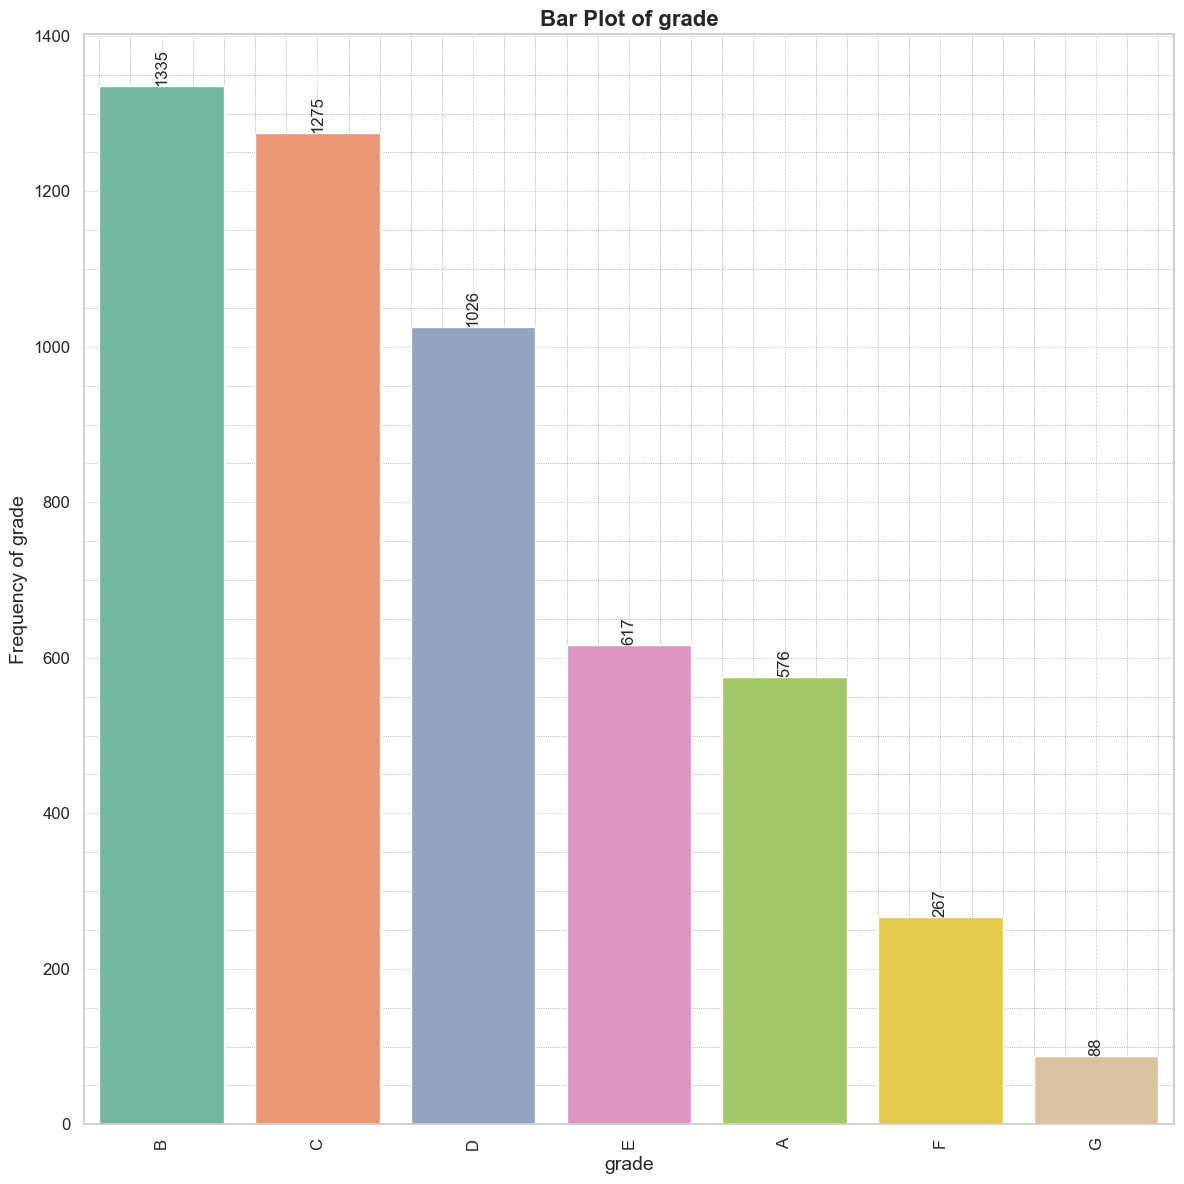

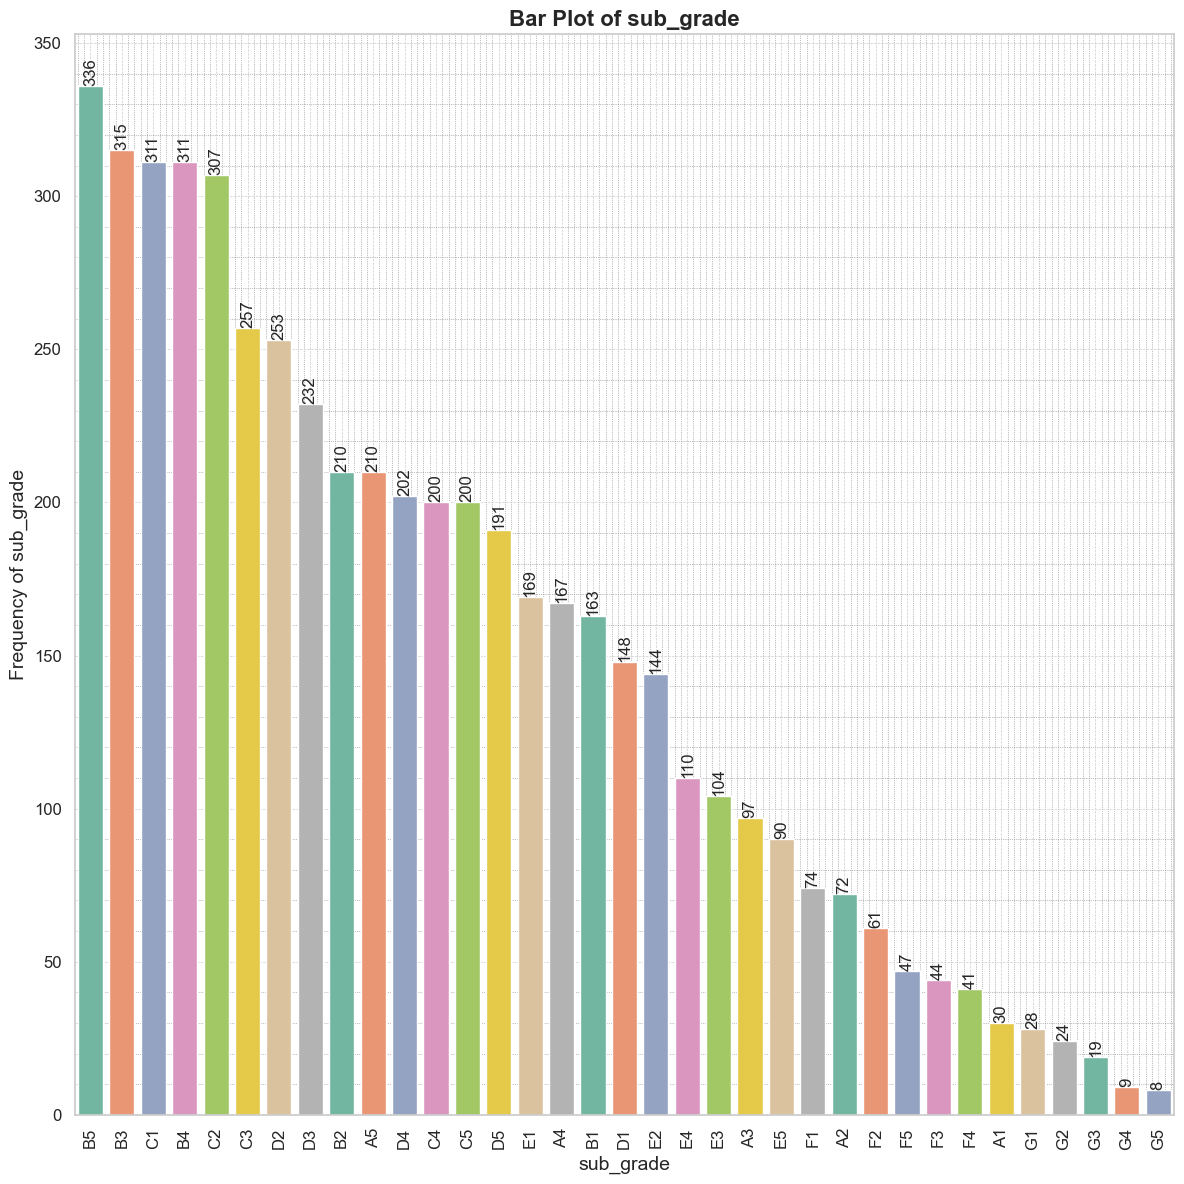

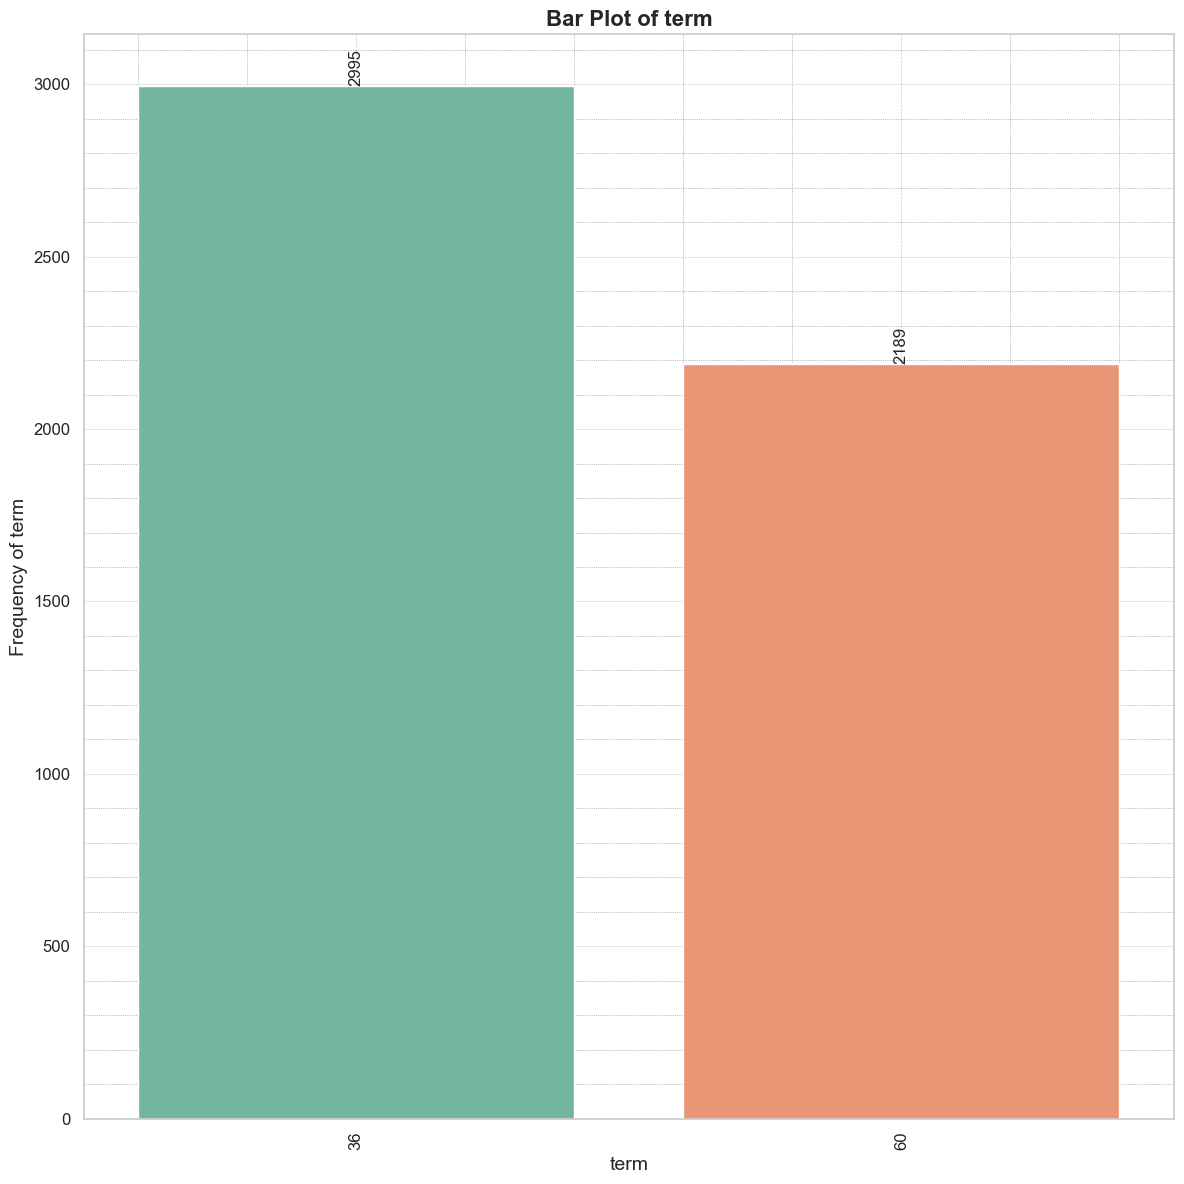

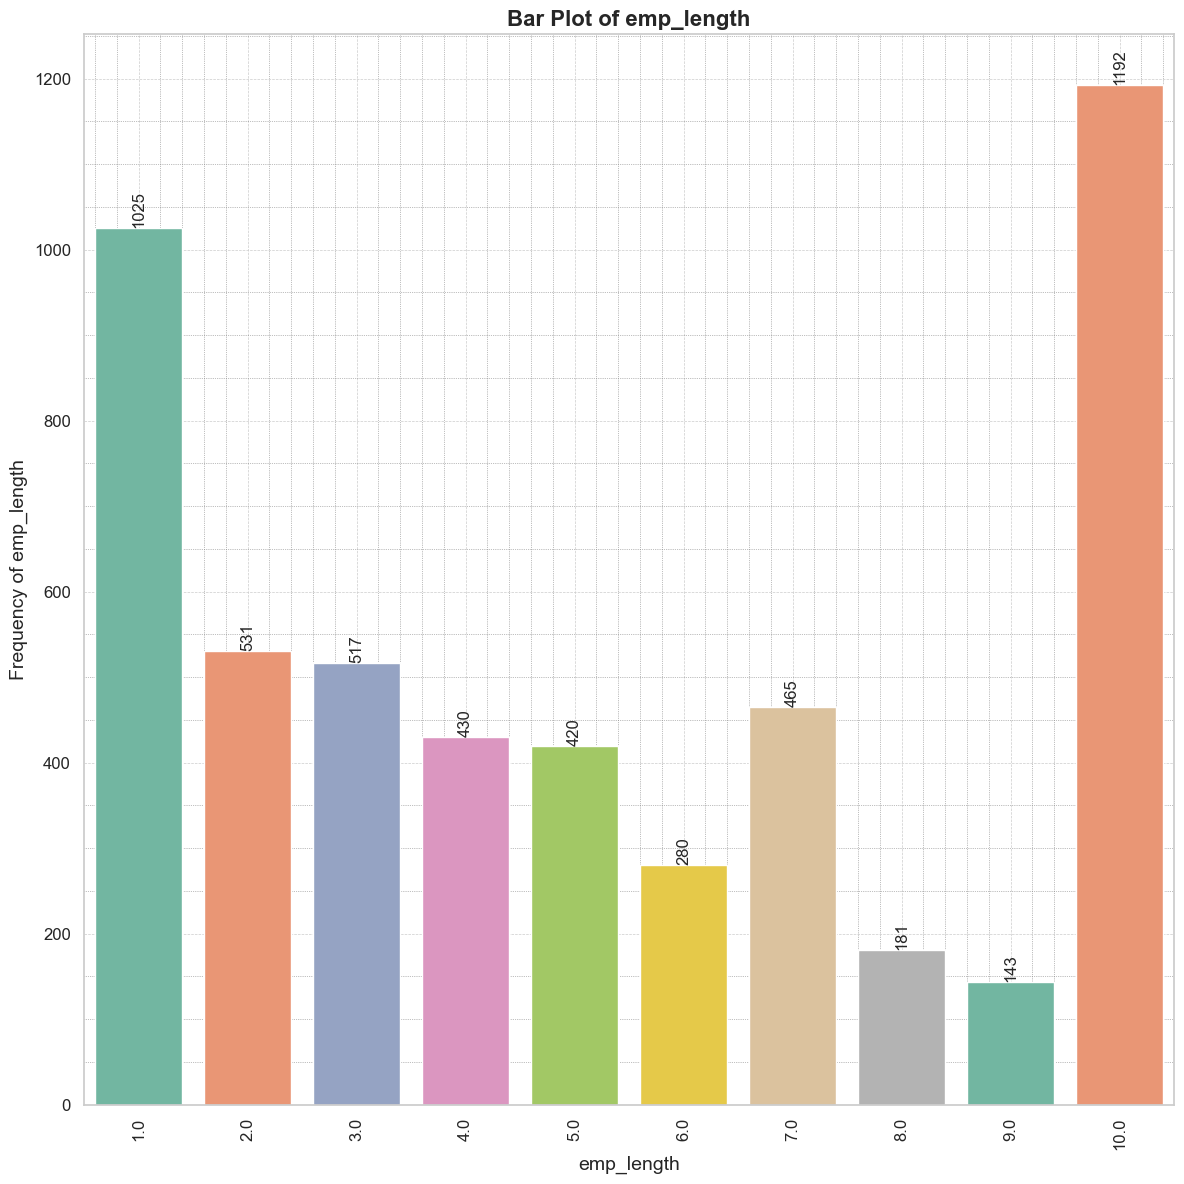

In [43]:

for cat_var in ['grade', 'sub_grade', 'term', 'emp_length']:
    plot_bar_graph(
        loan,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

##### Unordered Categorical Analysis

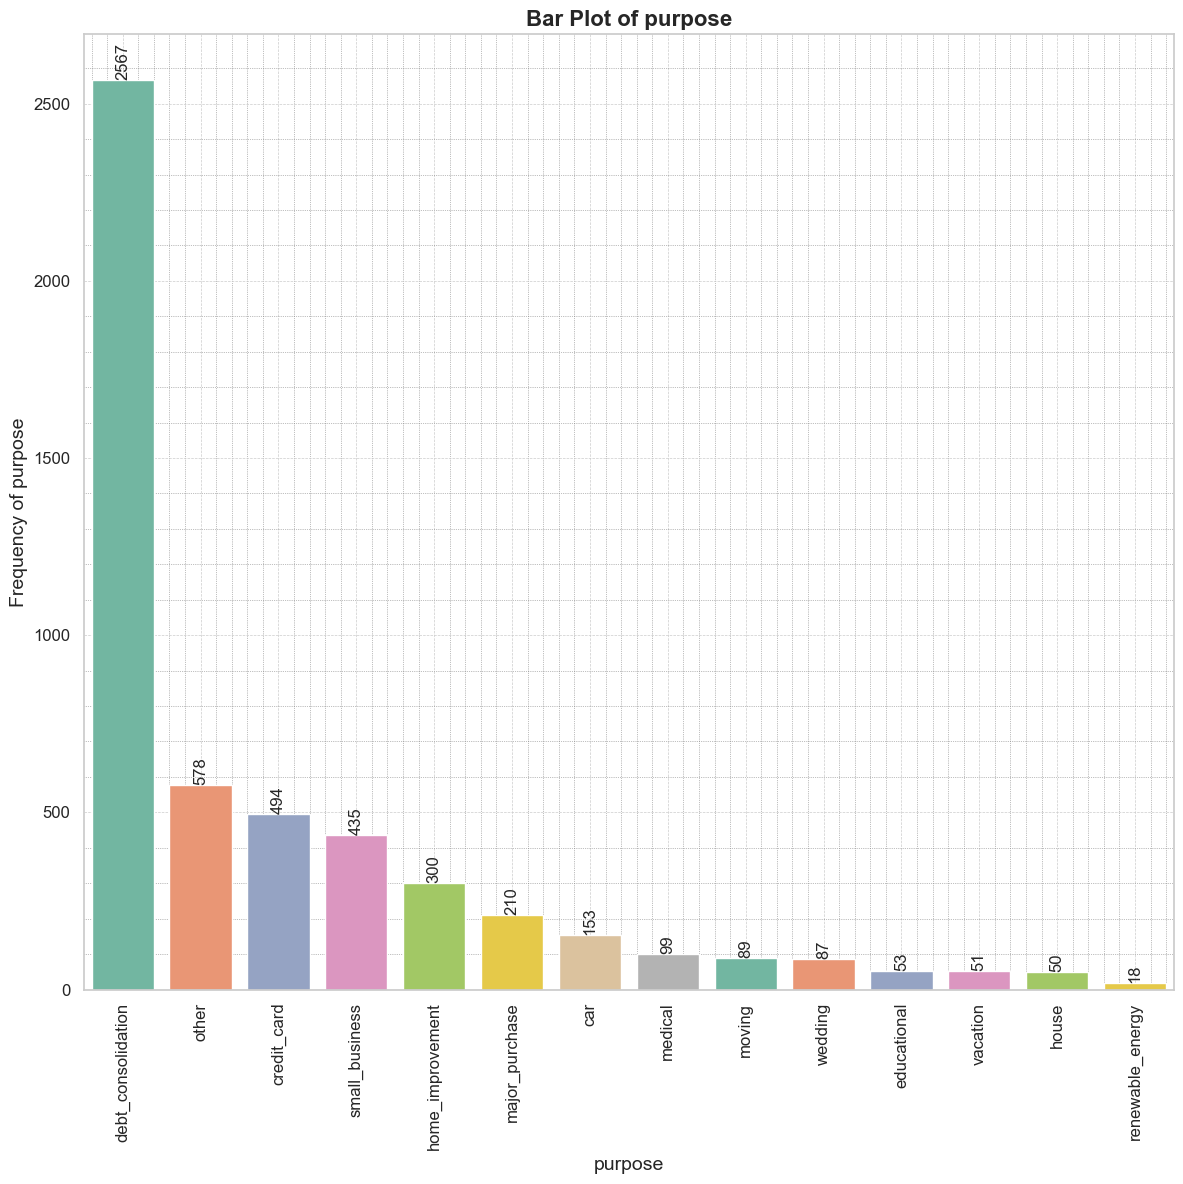

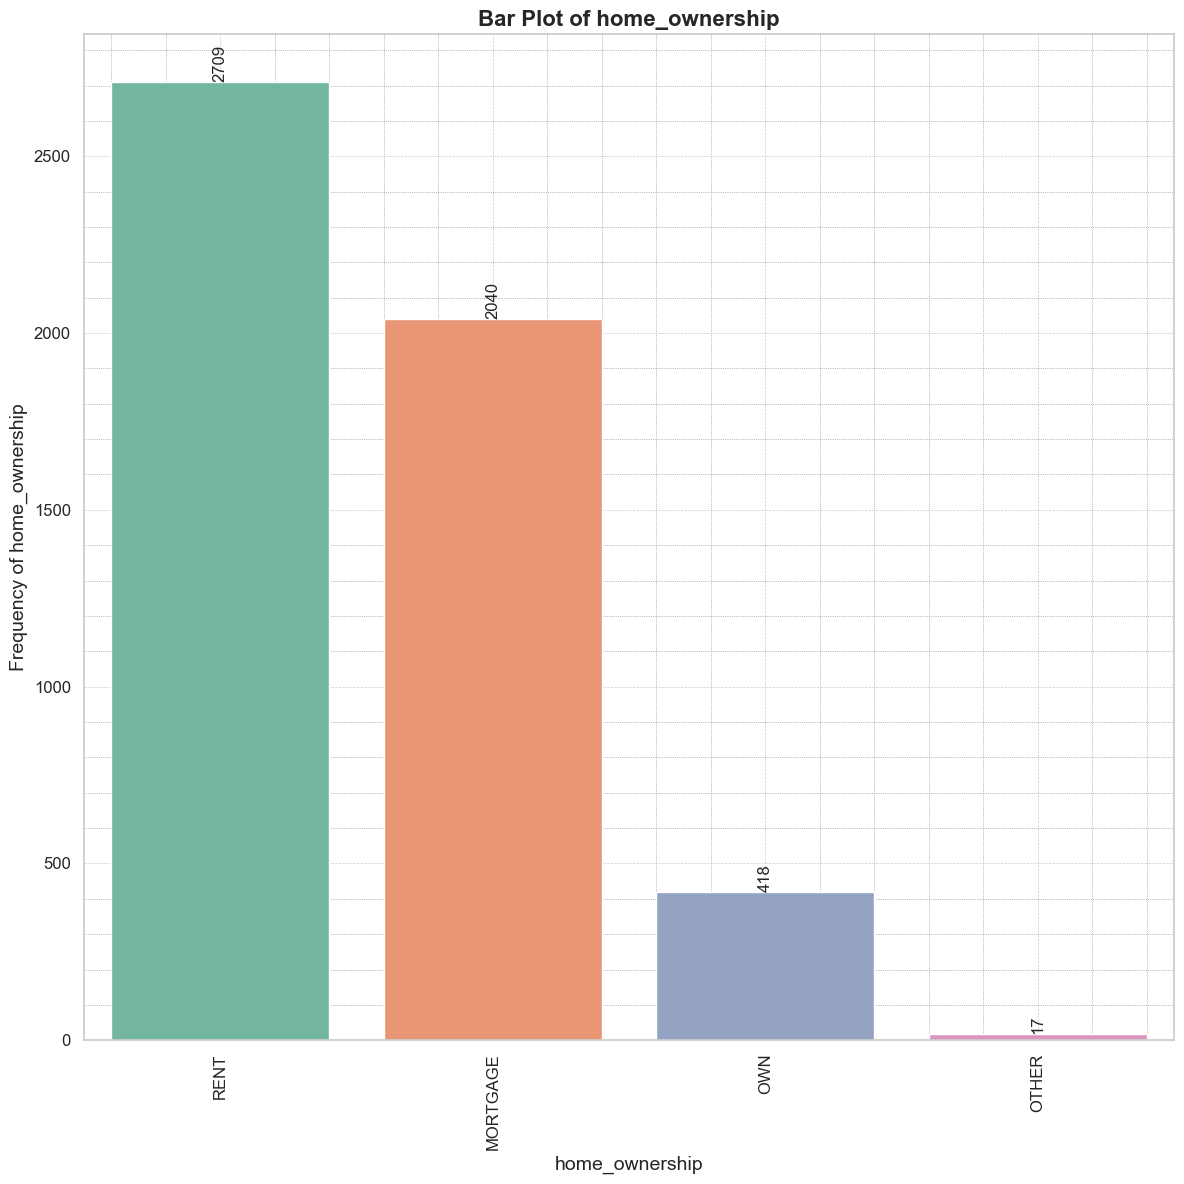

In [45]:
for un_cat_var in ['purpose', 'home_ownership']:
    plot_bar_graph(
        loan,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = un_cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

####  Quantitative variables

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


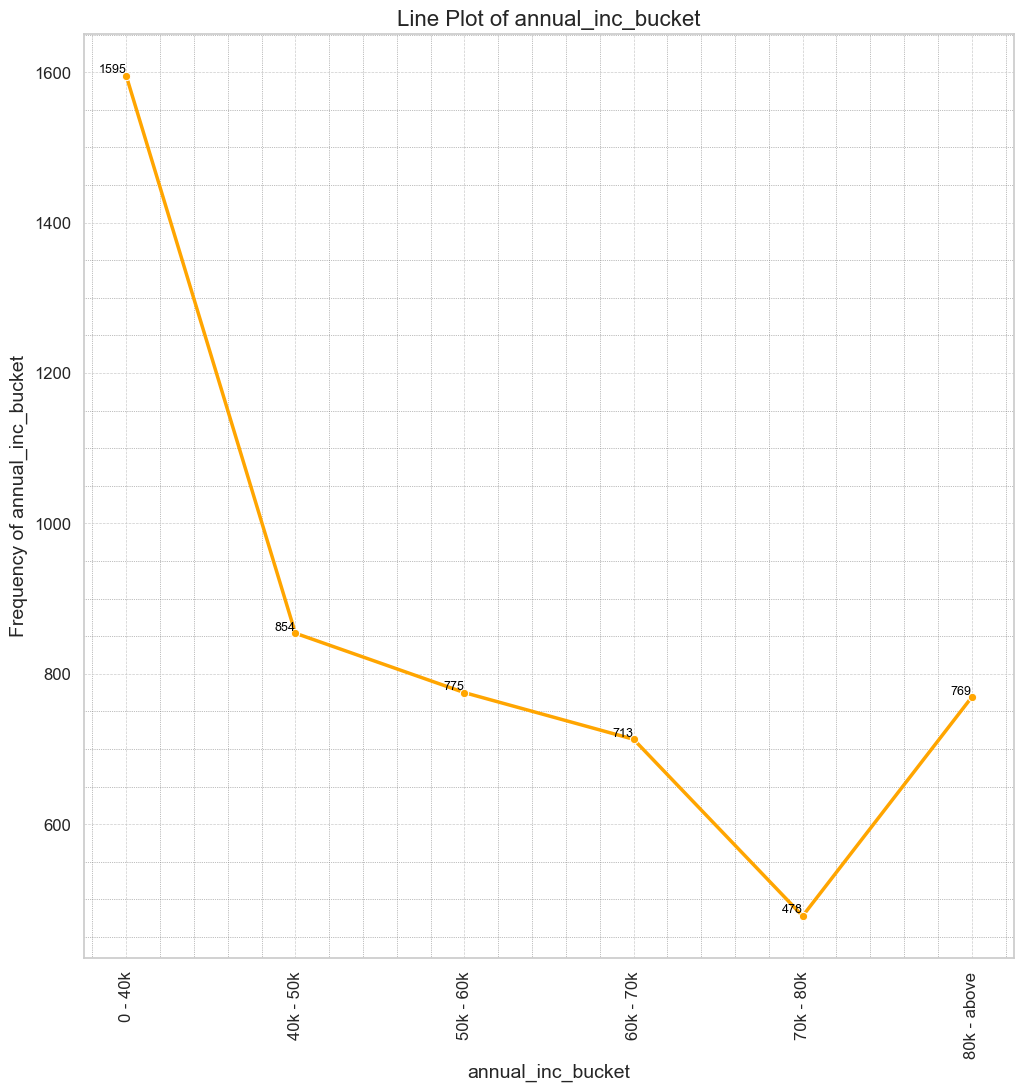

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


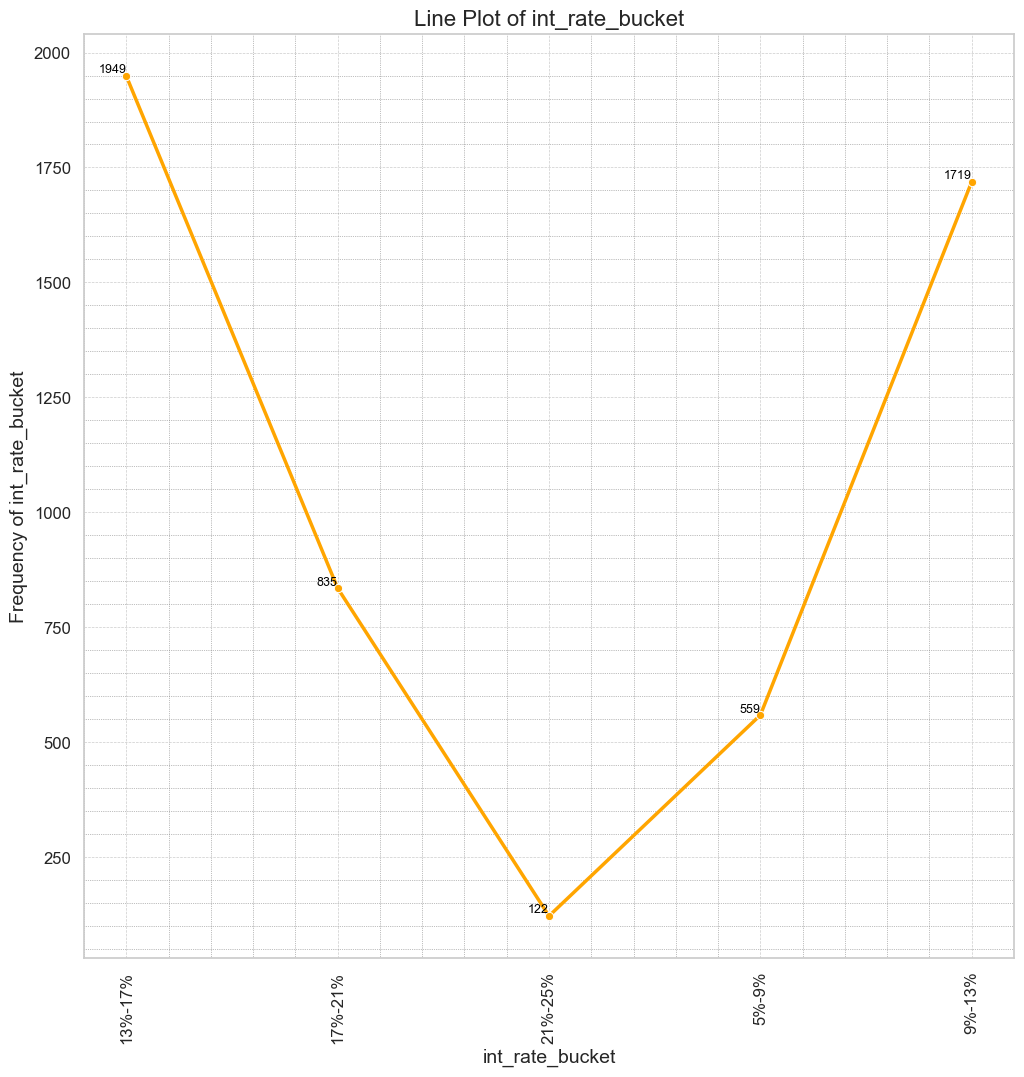

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


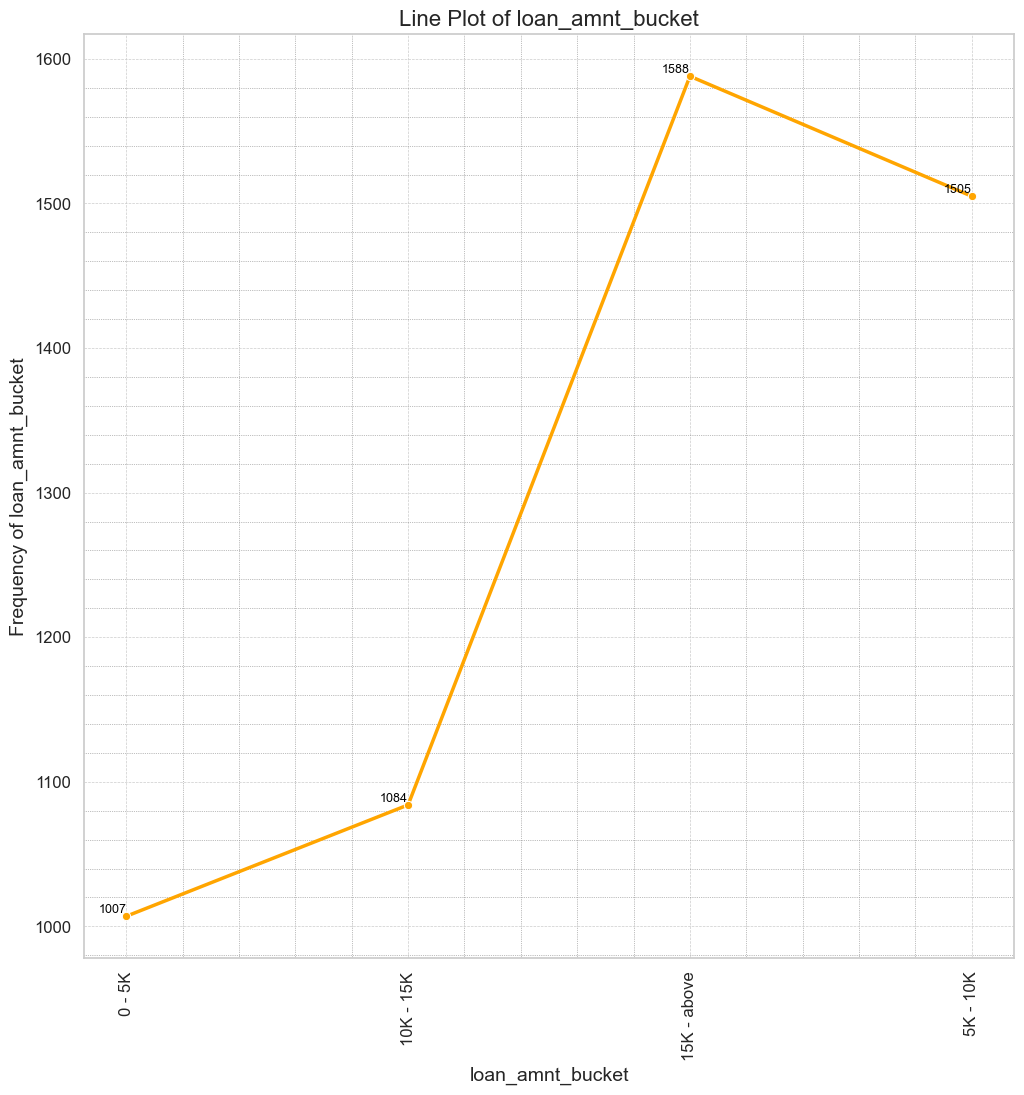

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


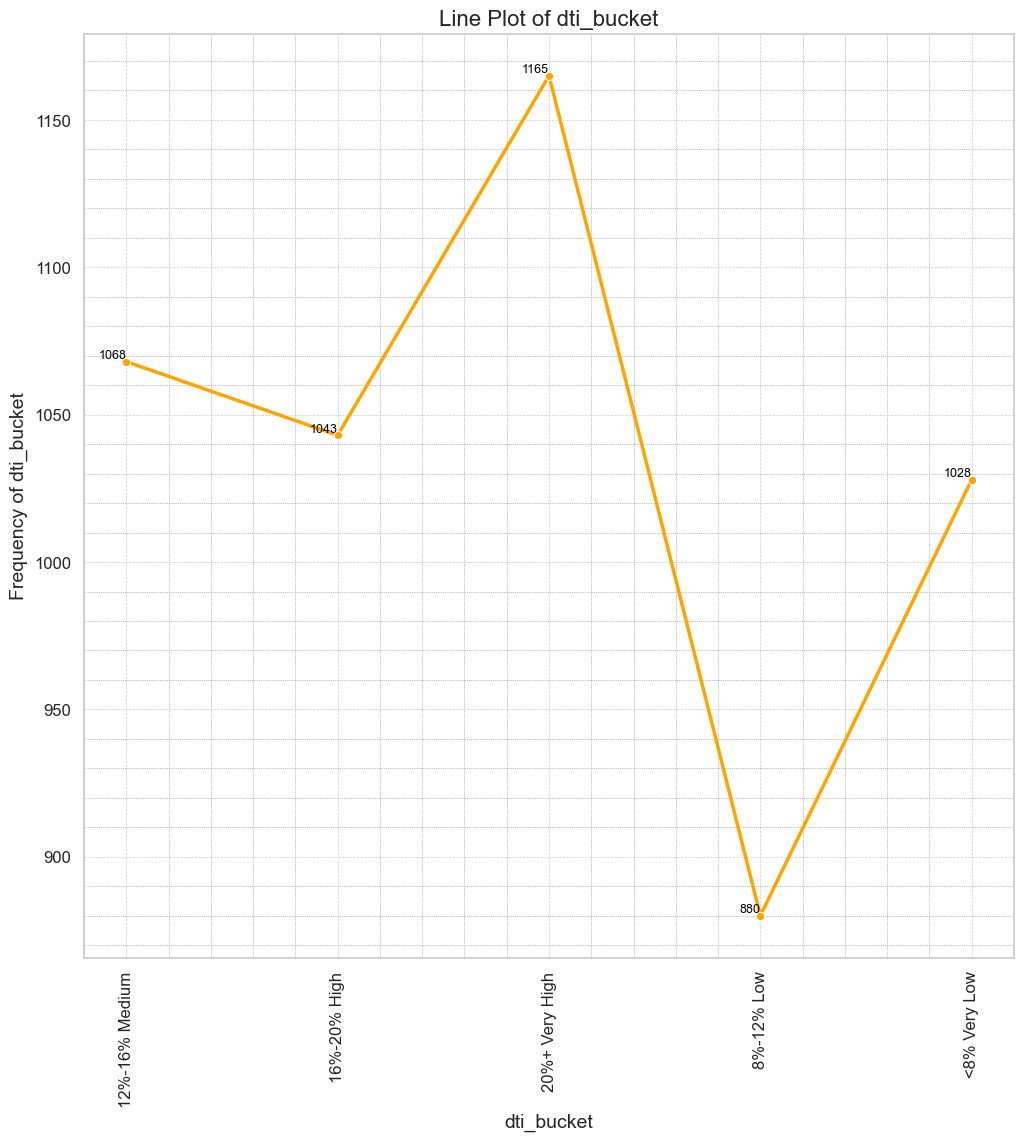

C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYARRA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


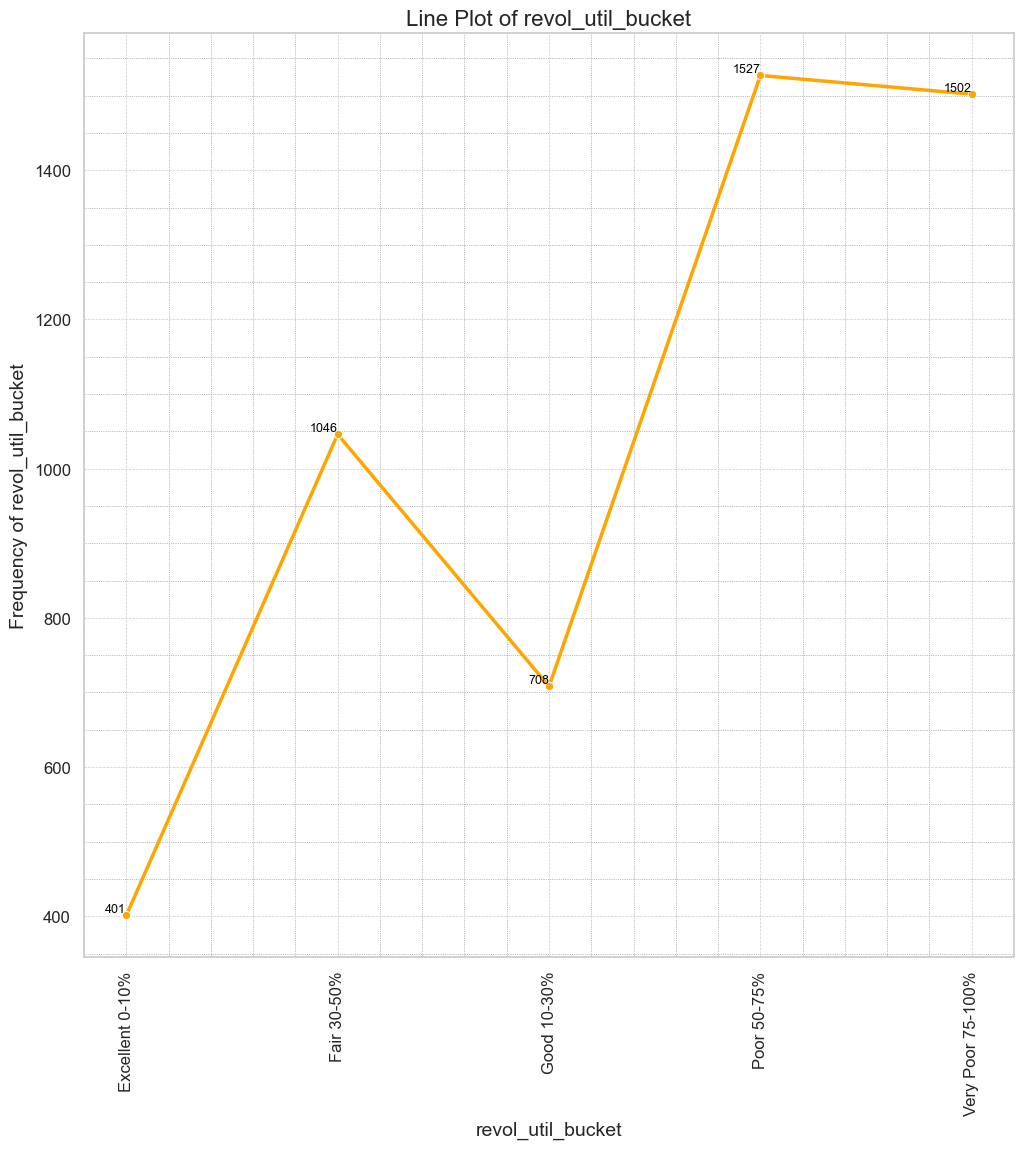

In [47]:
def plot_line_chart(df, x_column,y_column=None,hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, filter_column=None, filter_value=None):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    if filter_column and filter_value is not None:
        filtered_dataframe = df[df[filter_column] == filter_value]
    else:
        filtered_dataframe = df

    sb.set(style="whitegrid")
    plt.figure(figsize=figsize)

    x_data = filtered_dataframe[x_column].value_counts().sort_index()
    x_values = x_data.index
    y_values = x_data.values

    # Plotting the line plot with orange color and markers
    line_plot = sb.lineplot(x=x_values, y=y_values, hue=hue_column, marker='o', color='orange', linewidth=2.5)

    # Adding annotations to each data point
    for x, y in zip(x_values, y_values):
        plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom', color='black')

    # Set title and labels with improved font size
    if title:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation, fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid lines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.savefig(fname=x_column+'_univariate')
    plt.show()


for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'dti_bucket','revol_util_bucket']:
    plot_line_chart(
        loan,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Line Plot of {quant_var}',
        xlabel = quant_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

### Univariate Analysis Summary

1. **Grade:** **Grade B** has the most "Charged off" loan applicants (1,335), indicating the highest default risk. **Grade G** has the fewest (88), indicating the lowest default risk.

2. **Sub-Grade:** Within Grade B, **B5** shows the highest default risk, while **G5** shows the lowest.

3. **Term:** Loans with a **36-month** term had the highest number of defaults (2,995), suggesting shorter terms are associated with higher default rates.

4. **Employment Term:** Applicants employed for over **10 years** had the most defaults (1,192), indicating long-term employment does not guarantee repayment success.

5. **Purpose:** **Debt consolidation** was the top reason for default (2,567 applicants). The lending company should be cautious with these loans, as they are often used to pay off other debts.

6. **Home Ownership:** Most defaults were from applicants in **rented homes** (2,709). The lending company should assess the financial stability of renters, who may be more vulnerable to economic changes.

7. **Annual Income:** **1,595** defaults were from applicants earning less than **$40,000** annually. The company should scrutinize low-income applicants more closely, verifying income and repayment capacity thoroughly.

8. **Interest Rates:** A significant number of defaults (1,949) occurred with interest rates between **13%-17%**. The company should consider offering lower rates to mitigate default risk.

9. **Loan Amount:** **1,588** defaults involved loans of **$15,000** or more. High loan amounts should be granted only to applicants with strong credit histories and repayment capabilities.

10. **Debt-to-Income Ratio:** **1,165** defaults were from applicants with high debt-to-income ratios. Strict ratio requirements should be enforced to prevent lending to over-indebted individuals.

11. **Revolving Line Utilization Rate (RLUR):** Defaults were highest among those with **Poor (50%-75%)** and **Very Poor (75%-100%)** RLUR, at 1,527 and 1,502 respectively. RLUR should be a key consideration in lending decisions to gauge credit utilization.
ons to gauge credit utilization.



##  Bivariate Analysis

Bivariate analysis of below variables against Loan Status 

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Employment length (emp_length)
        4. Loan purpose (purpose)
        5. Home Ownership (home_ownership)
        6. Verification Status (verification_status)
        
#### 2. Quantitative variables
    1. Annual Income Bucket (annual_inc_bucket)
    2. Int Rate Bucket (int_rate_bucket)
    3. Debt to Income Bucket (dti_bucket)
    5. Loan Amount Bucket (loan_amnt_bucket)
    6. Revolving Line Utilization rate(revol_util_bucket)


In [50]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation', 0)
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[x], df['loan_status'])
    charged_off_data['Total'] = charged_off_data.sum(axis=1)
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)

    # Plot
    fig, ax1 = plt.subplots(figsize=figsize)

    # Bar plot for counts
    sb.countplot(x=x, hue=hue, data=df, order=order, palette=palette, ax=ax1)

    # Annotate bar plot
    if annot:
        for p in ax1.patches:
            ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='black')

    # Line plot for Charged Off Percentage on the secondary y-axis
    ax2 = ax1.twinx()
    if order is not None:
        charged_off_data = charged_off_data.reindex(order)
    charged_off_plot = charged_off_data['Charged Off %']
    charged_off_plot.plot(ax=ax2, marker='o', color='r', legend=False)
    ax2.set_ylabel('Charged Off %', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.grid(False)

    # Set title and labels
    if title:
        ax1.set_title(title, fontsize=16, fontweight='bold')
    if xlabel:
        ax1.set_xlabel(xlabel, fontsize=14)
    if ylabel:
        ax1.set_ylabel(ylabel, fontsize=14)

    # Rotate x-axis labels
    ax1.tick_params(axis='x', rotation=x_tick_rotation)
    plt.yticks(fontsize=12)

    # Combine legends
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    combined_handles = handles1 + handles2
    combined_labels = labels1 + ['Charged Off %']

    ax1.legend(combined_handles, combined_labels, loc='upper right')

    # Improve layout
    plt.tight_layout()

    # Save the plot if a file name is provided
    plt.savefig(fname=xlabel+'_bivariate')

    # Show the plot
    plt.show()

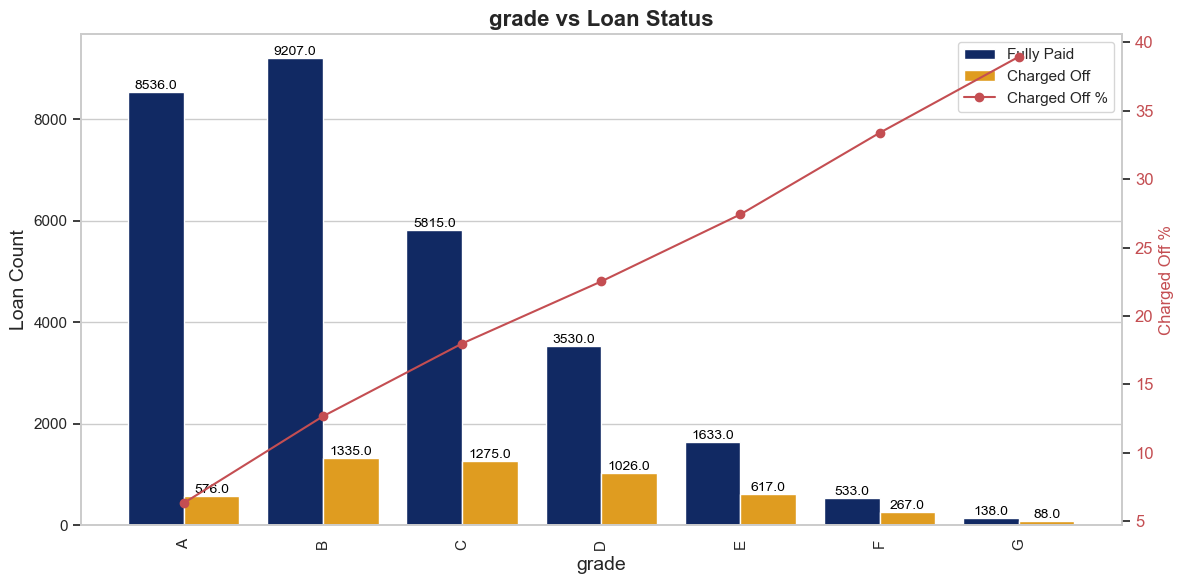

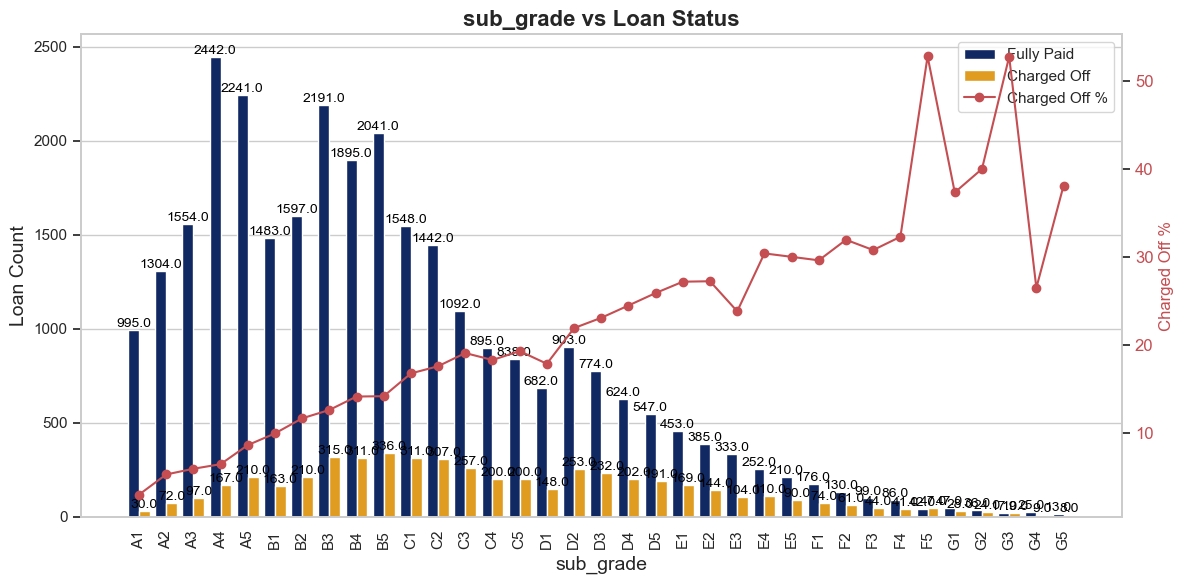

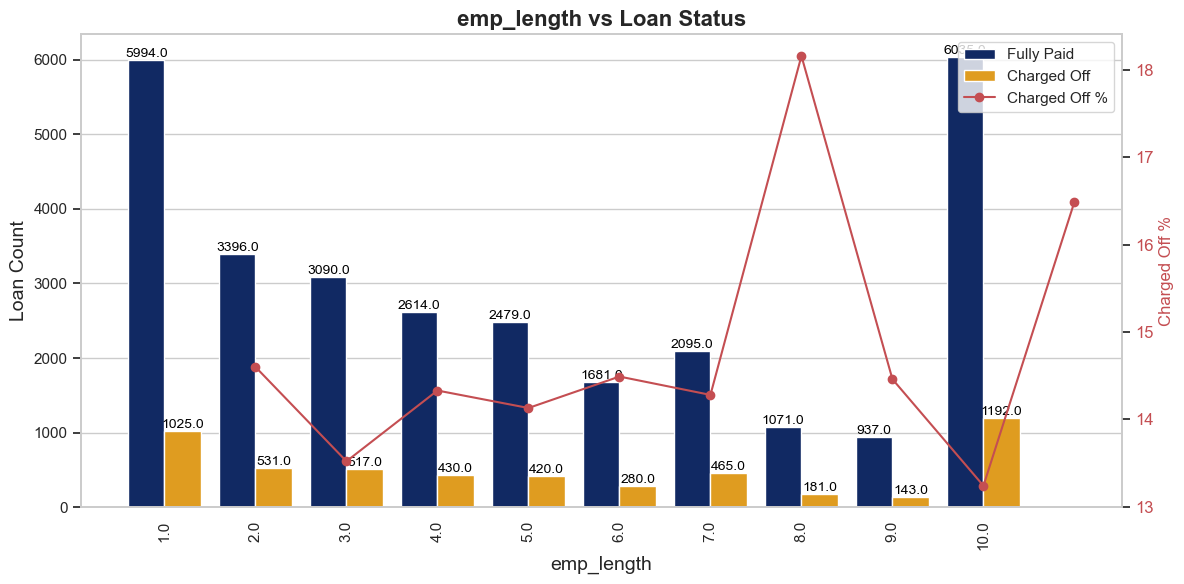

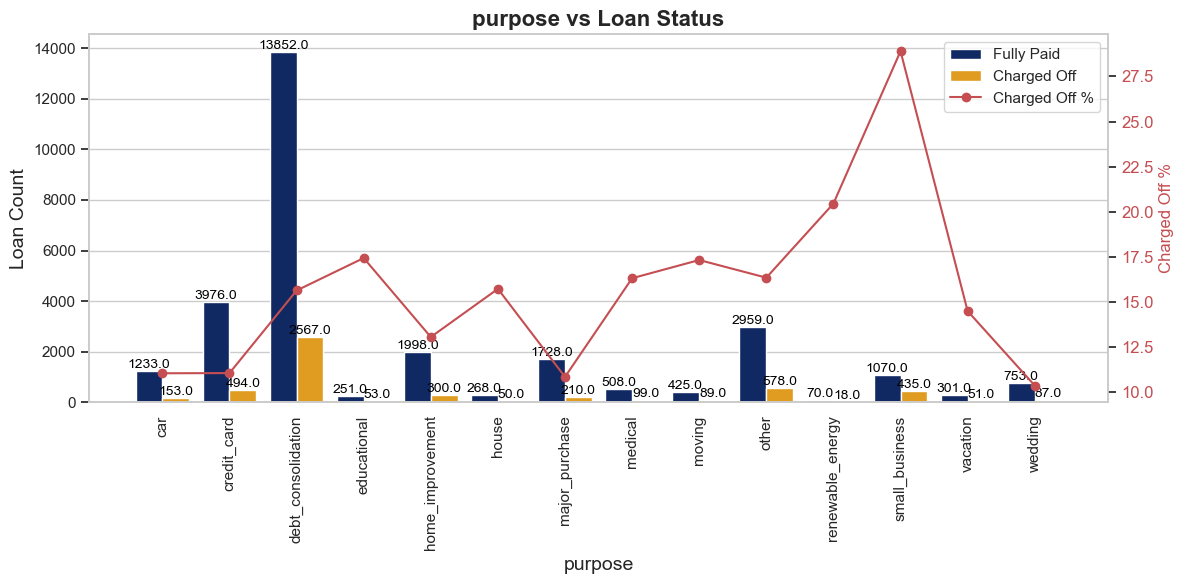

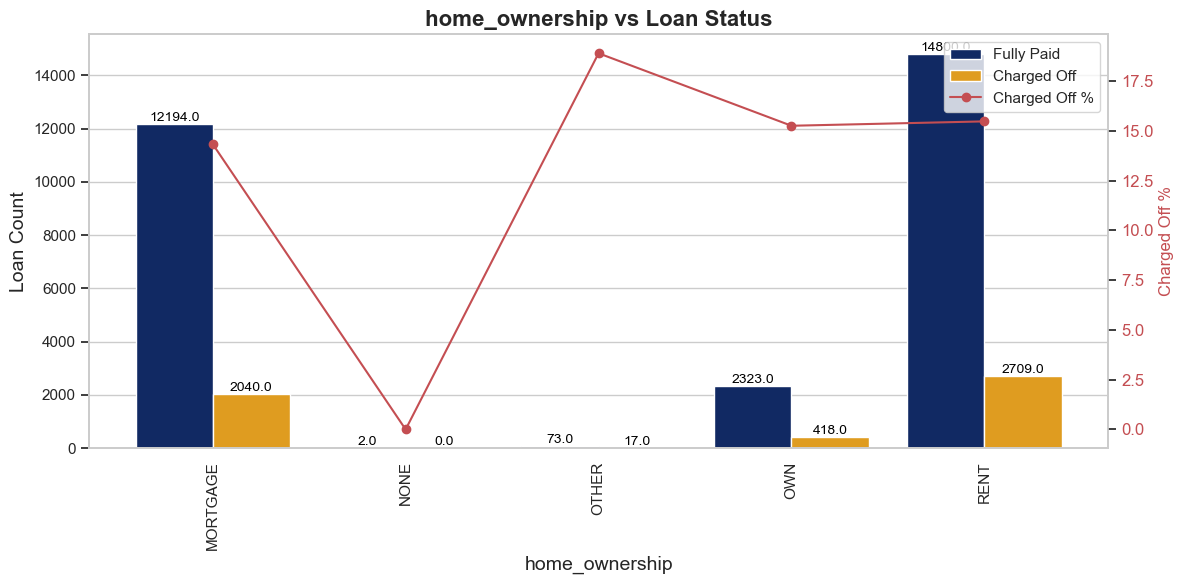

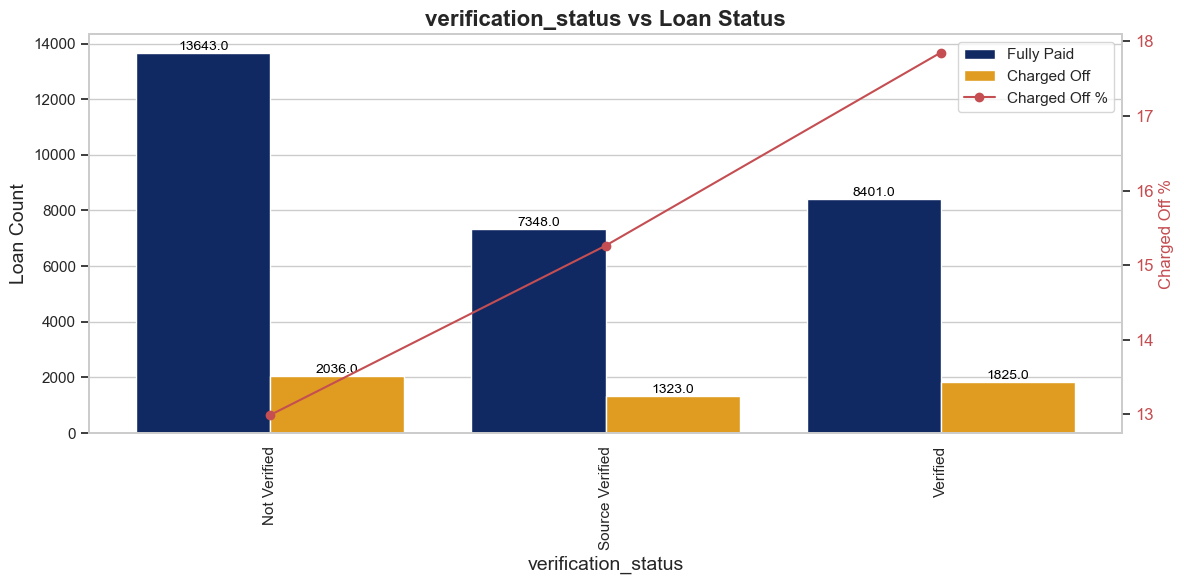

In [51]:
#Grade vs Loan Status
for col in ['grade','sub_grade','emp_length','purpose','home_ownership','verification_status']:
    order = loan[col].unique()
    countplot_graph({
        'data': loan,
        'x': col,
        'figsize': (12, 6),
        'hue': 'loan_status',
        'xlabel': col,
        'ylabel': 'Loan Count',
        'title': f'{col} vs Loan Status',
        'palette':['#032371','Orange'],
        'x_tick_rotation': 90,
        'order': sorted(order) if col in ['grade', 'sub_grade', 'term', 'emp_length', 'purpose', 'home_ownership', 'verification_status'] else order
})

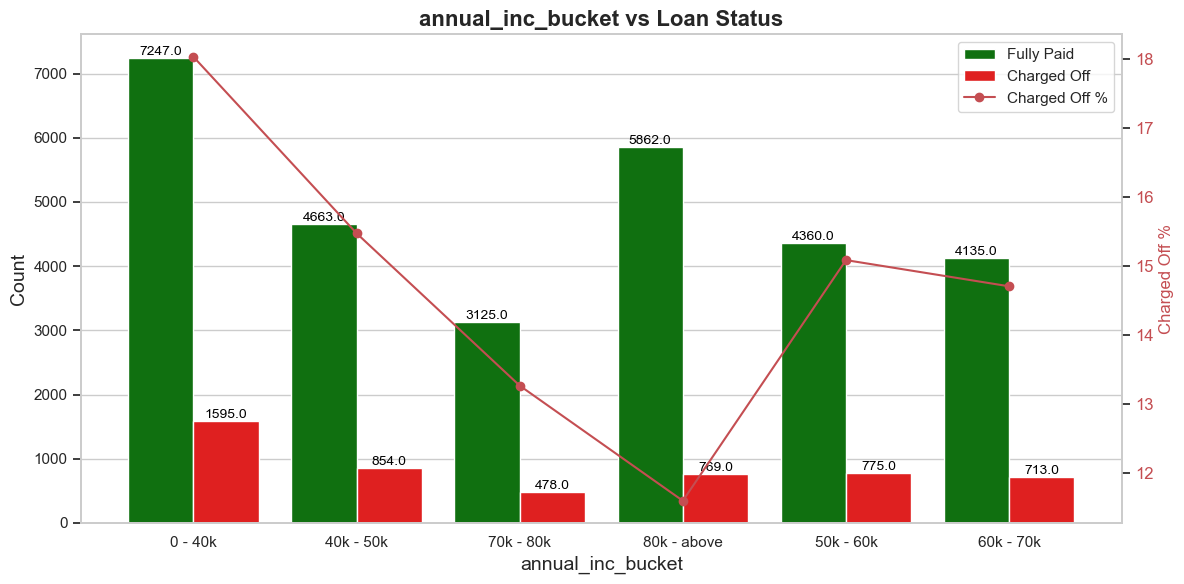

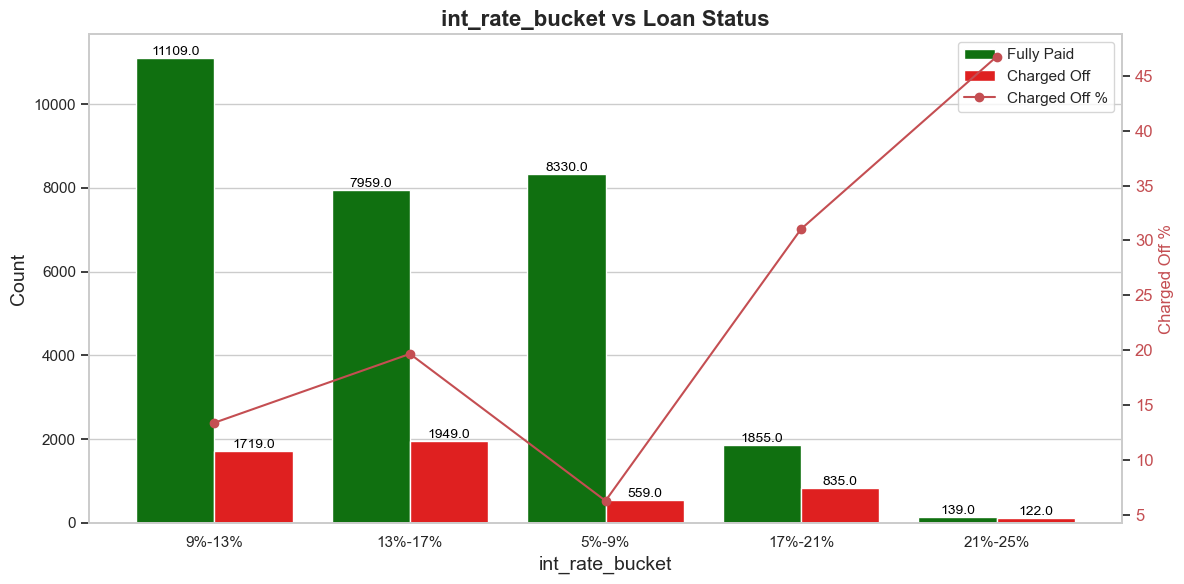

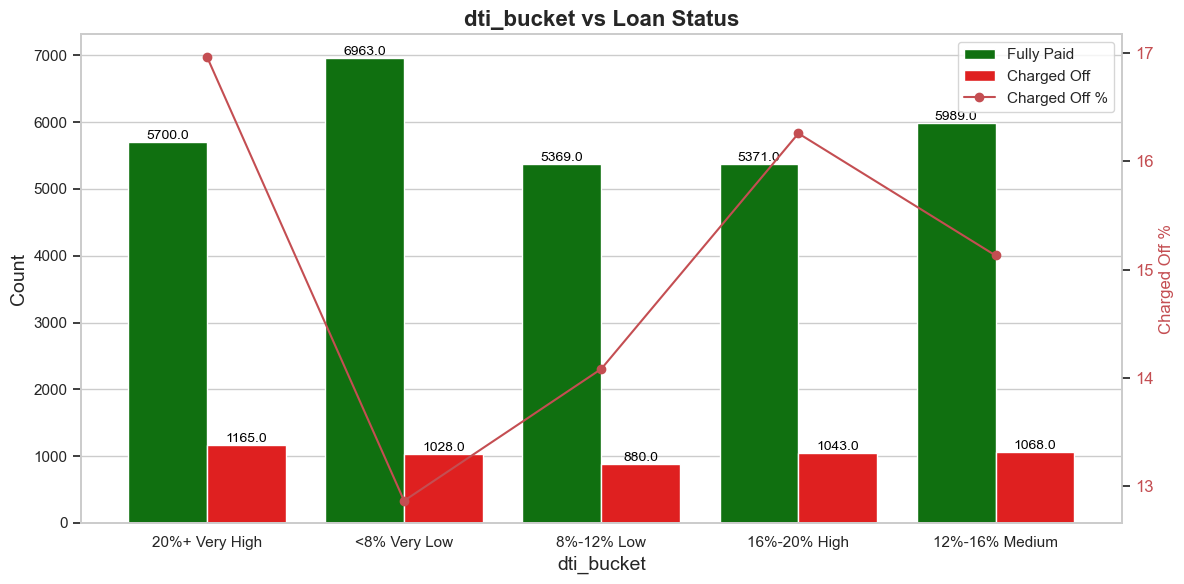

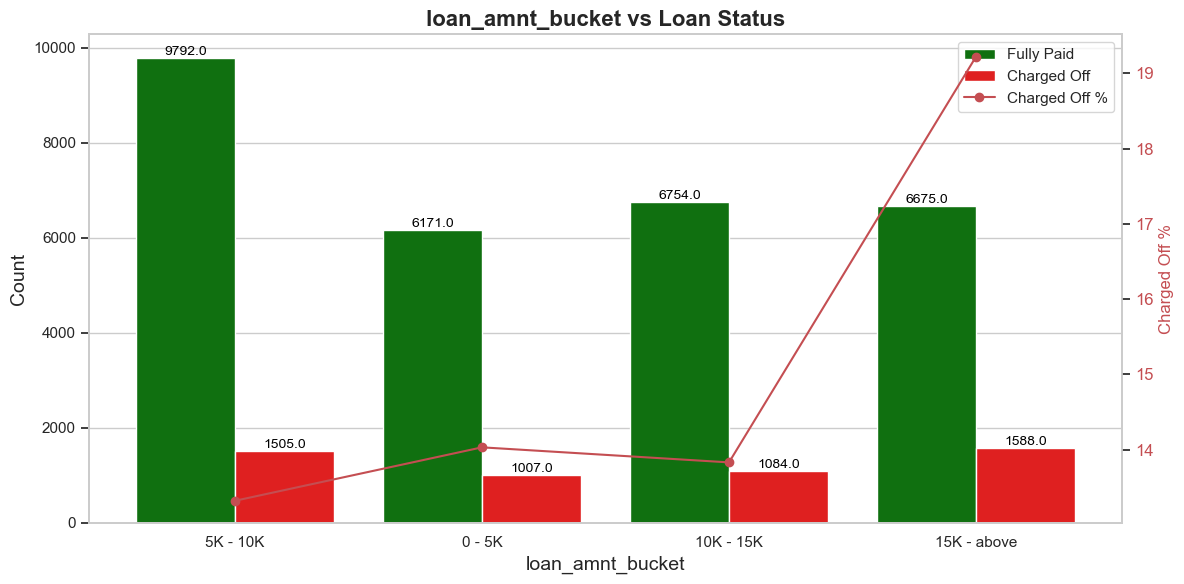

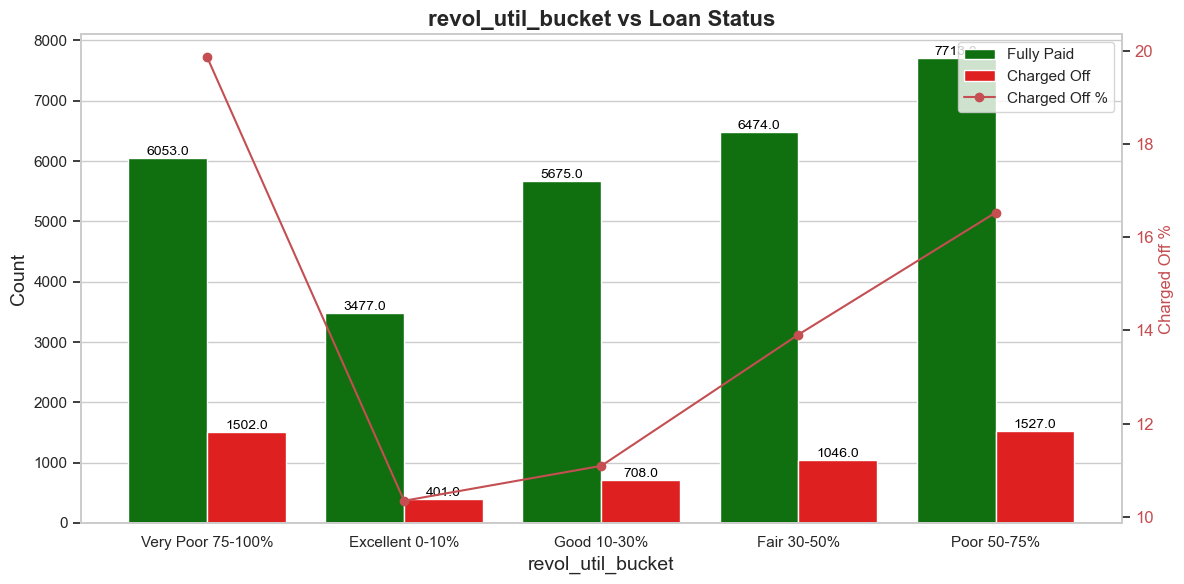

In [52]:
for col in ['annual_inc_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket','revol_util_bucket']:
    order = loan[col].unique()
    countplot_graph({
    'data': loan,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': ["Green","Red"],
    'x_tick_rotation': 0,
    'order': sorted(order) if col in ['grade', 'sub_grade', 'term', 'emp_length', 'purpose', 'home_ownership', 'verification_status'] else order
}, annot=True)

### Bivariate Analysis Summary ###

For Bivariate Analysis, **Loan_Status** is considered as one variable, representing Fully_Paid and Charged_Off states. The **Default Rate** or **Charged_Off percentage** is considered as the second variable against various other parameters such as grade, sub_grade, emp_length, purpose, home_ownership, and verification_status.

1. **Grades**: While Grade B had the highest default or ChargedOff applicants based on Univariate Analysis, the inclusion of Charged-Off % as another variable provides more insights. From bivariate analysis, it can be inferred that in absolute numbers, Grade B has a high number of default applicants (1335), whereas in relative numbers, Grade G has 38% of applicants defaulting. Hence, the lending company should consider relative numbers alongside absolute numbers.

2. **Suband B5**: Pay special attention to applicants with Subgrades B3, B4, and B5 as they are more likely to charge off in absolute numbers. Also, note subgrades F3 and G3, where the default rate is more than 50%. Implementing additional risk mitigation measures or offering them lower loan amounts could be considered.

3. **Employment Term**: Loan applicants with ten or more years of experience are more likely to default in absolute numbers, whereas in relative numbers, applicants with 8 years of experience have an 18% default rate.

4. **Purpose**: Applicants seeking loans for debt consolidation are high in absolute terms, which may result in a vicious debt cycle if financial discipline isn't followed. In relative terms, loans taken for small businesses have a higher percentage of defaults.

5. **Home Ownership**: This category doesn't provide much inference since most of the ownership types in relative terms have a 15-17% default rate.

6. **Verification Process**: Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

7. **Annual Income**: Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting both in absolute and relative terms. Hence, this should be a strong criterion for the lending company.

8. **Interest Rates**: Interest rates in the 13%-17% range are associated with defaults in absolute terms, whereas the default possibility is high in the high-interest rate bucket of 21-25% in relative terms.

9. **Debt to Income Ratio**: Applicants with a high DTI ratio (>20%) have a higher likelihood of defaulting both in absolute and relative terms. Hence, this should be a strong criterion for the lending company.

10. **Loan Amount**: Applicants receiving loan amounts of $15,000 or higher are more likely to default. The company can mitigate this risk by conducting more thorough assessments for larger loan requests and potentially capping loan amounts for higher-risk applicants.

11. **Revolving Line Utilization Ratio**: Applicants with poor (50-75%) RLUR are highly likely to default in absolute terms, whereas very poor (75-100%) RLUR applicants are highly likely to default in relative terms.


### Correlation Analysis

In [55]:
correlation_df=[]
correlation_df = loan[['loan_paid','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','revol_util']]


                 loan_paid  loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_paid         1.000000  -0.069937    -0.067180        -0.047523 -0.177554   
loan_amnt        -0.069937   1.000000     0.982184         0.936284  0.351884   
funded_amnt      -0.067180   0.982184     1.000000         0.954110  0.332702   
funded_amnt_inv  -0.047523   0.936284     0.954110         1.000000  0.353016   
term             -0.177554   0.351884     0.332702         0.353016  1.000000   
int_rate         -0.213453   0.282230     0.288279         0.281849  0.430974   
installment      -0.035701   0.931422     0.956517         0.900828  0.094000   
annual_inc        0.065471   0.392833     0.389624         0.372486  0.084175   
dti              -0.038995   0.103711     0.102903         0.110342  0.078698   
revol_util       -0.098182   0.070846     0.075266         0.079823  0.061834   

                 int_rate  installment  annual_inc       dti  revol_util  
loan_paid       -0.213453    -0.0

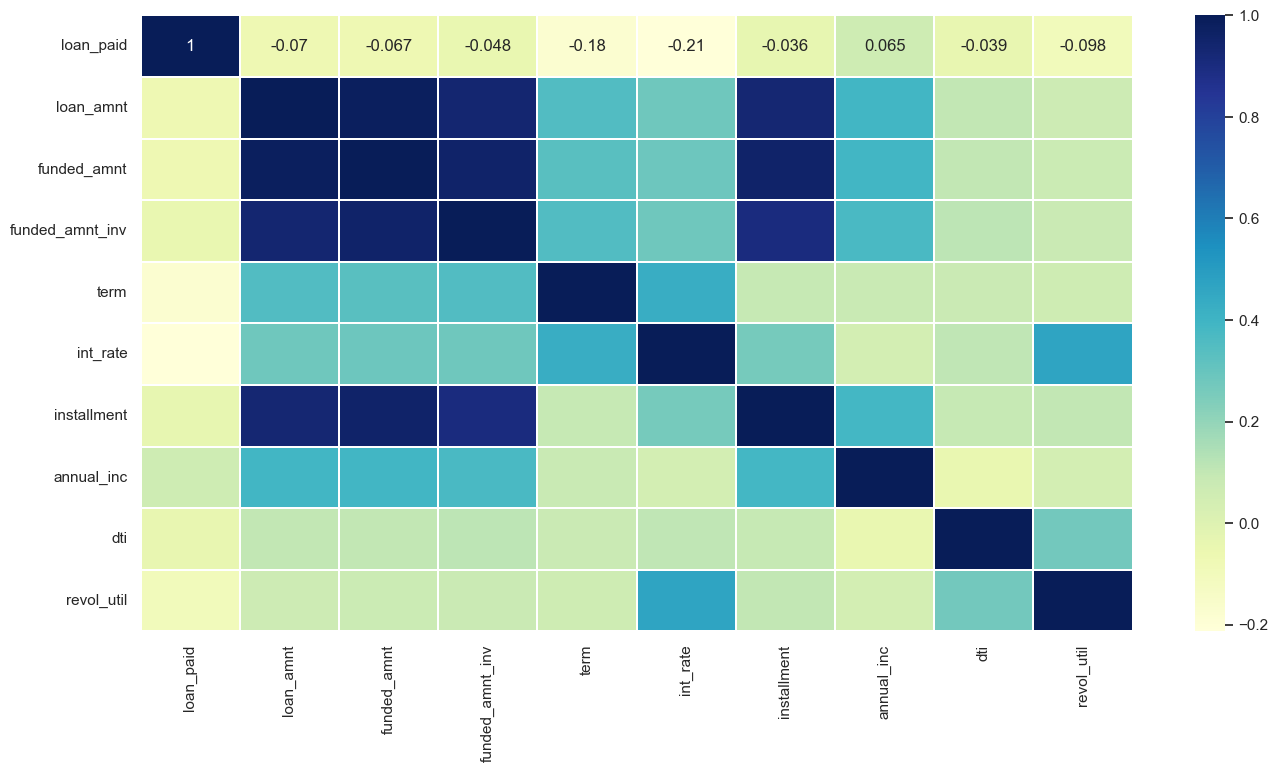

Interest Rate has negative correlation with loan_paid with correlation value: -0.21345321382777496


In [56]:
corr = correlation_df.corr()
sb.set(font_scale=1)
plt.figure(figsize=(16, 8))

sb.heatmap(corr, cmap="YlGnBu", annot=True,linewidths = .3) 
print(corr)
plt.show()
print('Interest Rate has negative correlation with loan_paid with correlation value:',corr['int_rate'].min())


## Correlation Analysis Summary

**Strong Correlation**
- *loan_amnt* shows a strong correlation with funded_amnt, int_rate, and funded_amnt_inv.
- *term* is strongly correlated with the interest rate.

**Weak Correlation**
- *loan_paid* exhibits weak correlations with most variables.
- *emp_length* has weak correlations with most variables.

**Negative Correlation**
- *int_rate* has a negative correlation with loan_paid.